# Q1. Logistic Regression Model.

for this question, we will use the logistic regression model given the dataset we are to used. The data consist of a list of students with their given variables such as gender, ethnicity, info on parent/family, previous exam scores, etc. and we are to predict the likelyhood of student failure or pass given those explanator variables.


# Importing Libraries

In [62]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline

# Exploratory Data Analysis

In [63]:
# We first read our data
Mydta = pd.read_csv('StudentsDataSet.csv')

In [64]:
# Now we can do data cleaning
Mydta.count(0)
Mydta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [65]:
Mydta.head(15)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


# Looking for Missing Data

<AxesSubplot:>

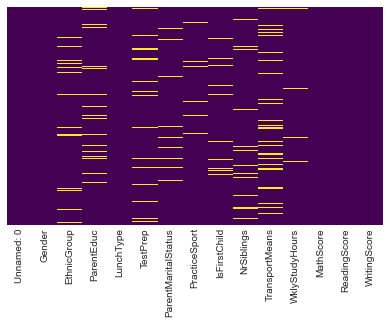

In [66]:
sns.heatmap(Mydta.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Remove or drop from our dataset
EthnicGroup: less missing data, however, the variable doesnot to great extend have much impact on student performance. 

PracticeSport: less missing data, however, the variable doesnot to great extend have much impact on student performance. 

IsFirstChild: less missing data, however, the variable doesnot to great extend have much impact on student performance. 

TransportMeans: too much missing data plus the variable doesnot to great extend have much impact on student performance.

# Non-Missing Data to Drop or Maintain

We will drop LunchType as it is insignificant to student performance, while we maintain the following; Gender, MathScore, ReadingScore, WritingScore as significant determinants of student performance


In [67]:
Mydta.drop(['EthnicGroup','PracticeSport','IsFirstChild','TransportMeans','LunchType'],axis=1,inplace=True)

# Maintaing in our dataset via imputation

Since missing values are not much, we will add the following by computing their mean and input the value to the missing data as they sugnificantly impact student performances. ParentEduc, TestPrep, ParentMaritalstatus, NiSiblings, WklyStudyHours.


# Fixing Missing Data by Imputation

We will use the different imputation methods to fix our missing data either as float, objects or integers, then adjust our dataset.


# Mean Imputation
We will use mean imputation for integers and from our dataset, we have NrSiblings as the only integer with missing value

In [68]:
Mydta.NrSiblings.mean()

2.1458942516082424

In [69]:
Mydta['NrSiblings'] = Mydta['NrSiblings'].fillna(2.2)

# Mode Imputation
We will use mode imputation to fill missing data in categorical type and from our dataset, we have; ParentMaritalStatus and TestPrep.

In [70]:
Mydta.ParentMaritalStatus.mode()

0    married
dtype: object

In [71]:
Mydta['ParentMaritalStatus'] = Mydta['ParentMaritalStatus'].fillna('married')

In [72]:
Mydta.TestPrep.mode()

0    none
dtype: object

In [73]:
Mydta['TestPrep'] = Mydta['TestPrep'].fillna('none')

# Converting Categorical Features

In [74]:
gender= pd.get_dummies(Mydta["Gender"],drop_first=True)

In [75]:
Mydta= pd.concat([Mydta,gender], axis=1)

In [76]:
Mydta.drop(['Gender'],axis=1,inplace=True)

In [77]:
Mydta.head(15)

,Unnamed: 0,ParentEduc,TestPrep,ParentMaritalStatus,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,male
0,0,bachelor's degree,none,married,3.0,< 5,71,71,74,0
1,1,some college,none,married,0.0,5 - 10,69,90,88,0
2,2,master's degree,none,single,4.0,< 5,87,93,91,0
3,3,associate's degree,none,married,1.0,5 - 10,45,56,42,1
4,4,some college,none,married,0.0,5 - 10,76,78,75,1
5,5,associate's degree,none,married,1.0,5 - 10,73,84,79,0
6,6,some college,completed,widowed,1.0,5 - 10,85,93,89,0
7,7,some college,none,married,1.0,> 10,41,43,39,1
8,8,high school,completed,single,3.0,> 10,65,64,68,1
9,9,high school,none,married,2.2,< 5,37,59,50,0


In [78]:
Mydta.isnull()

,Unnamed: 0,ParentEduc,TestPrep,ParentMaritalStatus,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,male
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
30636,False,False,False,False,False,False,False,False,False,False
30637,False,False,False,False,False,False,False,False,False,False
30638,False,False,False,False,False,False,False,False,False,False
30639,False,False,False,False,False,False,False,False,False,False


# Installing Cufflinks for plots

In [20]:
pip install cufflinks

In [21]:
import cufflinks as cf
cf.go_offline()

# Data Visualization

# Parent Education Level

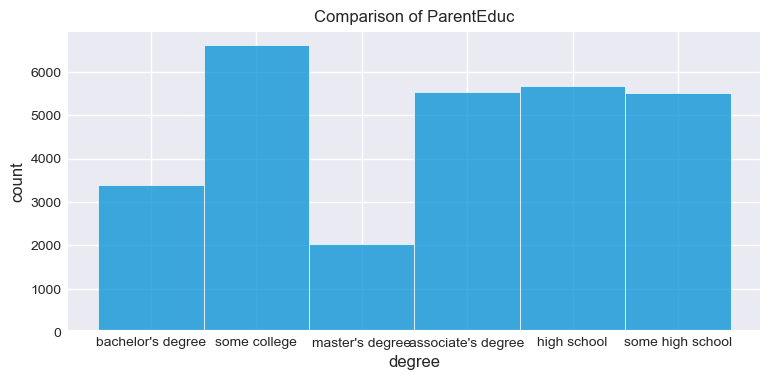

In [79]:
fig = plt. figure(figsize=(8,4), dpi=100)
sns.histplot(Mydta["ParentEduc"], palette = 'Blues')
plt.title('Comparison of ParentEduc', fontweight = 20, fontsize = 12)
plt.xlabel('degree')
plt.ylabel('count')
plt.show()

# Impact of ParentEduc on Student Scores

<AxesSubplot:xlabel='MathScore', ylabel='Count'>

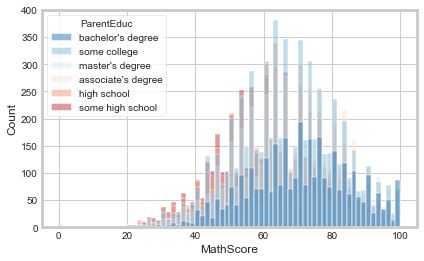

In [80]:
sns.set_style('whitegrid')
sns.histplot(x='MathScore',hue='ParentEduc',data=Mydta,palette='RdBu_r')


<AxesSubplot:xlabel='ReadingScore', ylabel='count'>

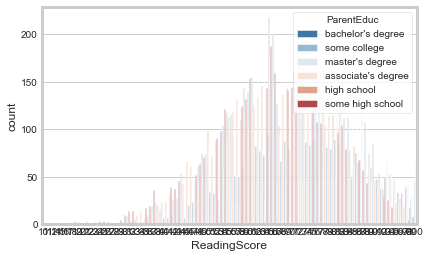

In [81]:
sns.set_style('whitegrid')
sns.countplot(x='ReadingScore',hue='ParentEduc',data=Mydta,palette='RdBu_r')

<AxesSubplot:xlabel='WritingScore', ylabel='count'>

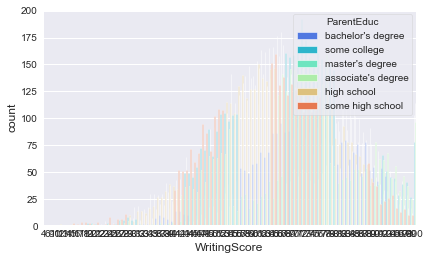

In [82]:
sns.set_style('darkgrid')
sns.countplot(x='WritingScore',hue='ParentEduc',data=Mydta,palette='rainbow')

# Student Scores


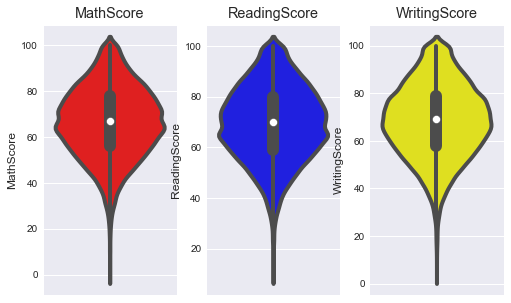

In [83]:
fig = plt. figure(figsize=(10,5))
plt.subplot(1,4,1)
plt.title('MathScore')
sns.violinplot(y='MathScore',data=Mydta,color='red',linewidth=4) 
plt.subplot(1,4,2) 
plt.title('ReadingScore')
sns.violinplot(y='ReadingScore',data=Mydta,color='blue',linewidth=4)
plt.subplot(1,4,3) 
plt.title('WritingScore')
sns.violinplot(y='WritingScore',data=Mydta,color='yellow',linewidth=4)
plt.show()

# Parent Marital Staus Vs. Number of Siblings

<AxesSubplot:xlabel='NrSiblings', ylabel='count'>

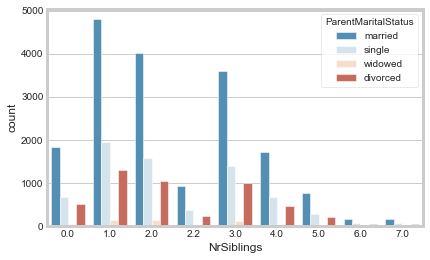

In [84]:
sns.set_style('whitegrid')
sns.countplot(x='NrSiblings',hue='ParentMaritalStatus',data=Mydta,palette='RdBu_r')

# Which Gender With More WklyStudyHours

<AxesSubplot:xlabel='WklyStudyHours', ylabel='count'>

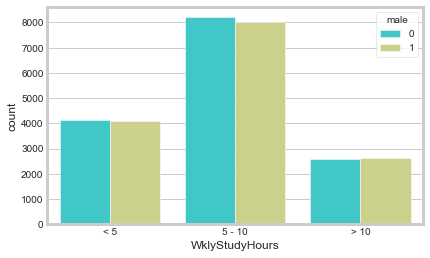

In [90]:
sns.set_style('whitegrid')
sns.countplot(x='WklyStudyHours',hue='male',data=Mydta,palette='rainbow')

In [91]:
Mydta.head(15)

,Unnamed: 0,ParentEduc,TestPrep,ParentMaritalStatus,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,male
0,0,bachelor's degree,none,married,3.0,< 5,71,71,74,0
1,1,some college,none,married,0.0,5 - 10,69,90,88,0
2,2,master's degree,none,single,4.0,< 5,87,93,91,0
3,3,associate's degree,none,married,1.0,5 - 10,45,56,42,1
4,4,some college,none,married,0.0,5 - 10,76,78,75,1
5,5,associate's degree,none,married,1.0,5 - 10,73,84,79,0
6,6,some college,completed,widowed,1.0,5 - 10,85,93,89,0
7,7,some college,none,married,1.0,> 10,41,43,39,1
8,8,high school,completed,single,3.0,> 10,65,64,68,1
9,9,high school,none,married,2.2,< 5,37,59,50,0


In [107]:
Mydta.drop(['WklyStudyHours'],axis=1,inplace=True)

In [108]:
Mydta.head()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore,male
0,0,3.0,71,71,74,0
1,1,0.0,69,90,88,0
2,2,4.0,87,93,91,0
3,3,1.0,45,56,42,1
4,4,0.0,76,78,75,1


# Building a Logistic Regression model
 We Split our data into a training set and test set. We will use MathScore as our dependent variable y and the rest of our variables will serve as the independent variables x.

# Train Test Split

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(Mydta.drop('MathScore',axis=1), 
                                                    Mydta['MathScore'], test_size=0.30, 
                                                    random_state=101)

# Training and Predicting

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\MY PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [113]:
predictions = logmodel.predict(X_test)

# Model Evaluation 
We now check precision,recall,f1-score using classification reports.

In [114]:
from sklearn.metrics import classification_report

In [115]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         3
          21       0.00      0.00      0.00         5
          22       0.00      0.00      0.00         5
          23       0.00      0.00      0.00         4
          24       0.00      0.00      0.00         5
          25       0.00      0.00      0.00         4
          26       0.00      0.00      0.00         7
          27       0.00      0.00      0.00        12
          28       0.00      0.00      0.00         8
          29       0.00      0.00      0.00        15
          30       0.00      0.00      0.00        13
          31       0.00      0.00      0.00        21
          32       0.00      0.00      0.00        26
          33       0.00    

C:\Users\MY PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MY PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MY PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conclusion

NameError: name 'r2_square' is not defined